What we need it’s a CCTV on every corner of nyc. Fix the & place sped bump on every street…we have several holes like this in Astoria
[0.55018026]
nan
[0.51502335]
hm.com
Watch More
[0.5753527]
Yep but now it’s all over in areas where there are no schools too. So how is it for school zones now?
[0.5402207]
1
1
[0.51502335]
Lowering the speed limit to 25mph all over NYC is nothing more than a cash grab to use more cameras and bill drivers. Enforce laws on pedestrians and bicyclist who don’t obey traffic laws and often times creates most traffic incidents.
[0.52709293]
Well, yes, but (a) there is a painted bike lane visible in this video (and one in the other direction) 1 yr ago, (b) there was a bike lane separated by pylons until the resurfacing, and (c) adults are not allowed to bike on sidewalks. So, your complaint is overwrought.
[0.3943438]
No, but “NYCDOT violence” takes lives by listening to lobbyists and hiring “anti-car” kindergarteners to do street designs.
[0.4855933]
volvocar

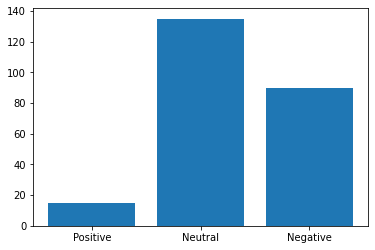

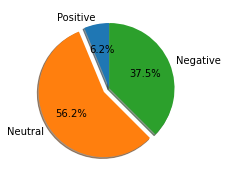

In [82]:
if __name__ = "__main__":
    from tensorflow.keras.models import load_model
    import wget
    import re
    import tarfile
    import pandas as pd
    import matplotlib.pyplot as plt
    import datetime
    import csv

    def downloadFile():
        url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
        file_get = wget.download(url)

    def extractFile():
        file_tar = tarfile.open('aclImdb_v1.tar.gz')
        file_tar.extractall()
        
    # Vocabulary: All words used, starting by the most frequent
    with open('aclImdb/imdb.vocab', encoding="UTF-8") as f:
        vocab = [word.rstrip() for word in f]
        # Keep only most frequent 5000 words rather than all 90000
        # Just saving memory - the long tail occurs too few times
        # for the model to learn anything anyway
        vocab = vocab[:5000]
        print('%d words in vocabulary' % (len(vocab),))
        
    def bow_onehot_vector(tokens):
        vector = [0] * len(vocab)
        for t in tokens:
            try:
                vector[vocab.index(t)] = 1
            except:
                pass  # ignore missing words
        return vector

    def text_tokens(text):
        if type(text) == float:
            return ''
        text = text.lower()
        text = re.sub("\\s", " ", text)
        text = re.sub("[^a-zA-Z' ]", "", text)
        tokens = text.split(' ')
        return tokens
    def start():
        # stats data
        data = []
        sentiment = load_model('saved_model/model.h5')
        filename = 'Twitter_' + datetime.datetime.now().strftime("%Y%m%d") + '.csv'
        twitter = pd.read_csv(filename)
        for text in twitter['Comments']:
            test_text = text
            test_tokens = text_tokens(test_text)
            print(test_text)
            predicton = sentiment.predict([bow_onehot_vector(test_tokens)])[0]
            print(predicton)
            stats = (text, predicton)
            data.append(stats)
        # saving data
        with open('tweet_data.csv', 'w', newline='', encoding='utf-8') as f:
            header = ['Tweet', 'Prediction']
            writer = csv.writer(f)
            writer.writerow(header)
            writer.writerows(data)
        stats_file =  pd.read_csv('tweet_data.csv')
        p = stats_file['Prediction']
        x = []
        for y in p:
            x.append(y[1:-1])
        neutral = 0
        positive = 0
        negative = 0
        for value in x:
            if float(value) >= 0.7:
                positive += 1
            elif float(value) < 0.7 and float(value) >= 0.5:
                neutral +=1
            else:
                negative +=1

        fig = plt.figure()

        labels = ['Positive', 'Neutral', 'Negative']
        val = [positive, neutral, negative]
        explode = (0, 0.1, 0,)

        plt.bar(labels, val)
        plt.figure(figsize=(3, 3))
        plt.pie(val, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    start()